In [1]:
import torch
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

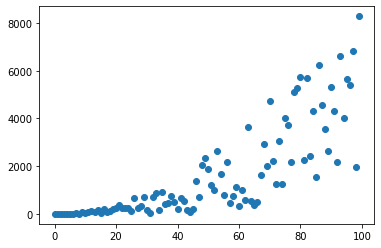

In [2]:
x1_points = []
x2_points = []
y_points = []

for i in range(100):
    x1_points.append(float(i))
    x2_points.append(float(i))
    y_points.append(rand.uniform(x1_points[-1], x2_points[-1]*x1_points[-1]))


plt.plot(x1_points, y_points, "o")
plt.show()

In [3]:
# Lets create a new joint x_points list

x_points = []

for i in range(len(x1_points)):
    x_points.append([x1_points[i], x2_points[i]])

In [4]:
# Split data into training and validation sets

X_train, X_test, y_train, y_test = train_test_split(x_points, y_points, test_size=0.3, random_state=42)

In [5]:
# Now that we've generated some points at random, its time to use torch 
# to execute linear regression

X_train = torch.tensor(X_train)
y_train = torch.tensor(y_train)

X_test = torch.tensor(X_test)
y_test = torch.tensor(y_test)

In [27]:
# Helper function for finding the optimal b
def grad_descent(y, b, lr=0.00000000001):  # Reduced learning rate
    grad = torch.autograd.grad(y, b)[0]

    return b - lr * grad, grad

# Helper function for representing the objective function
def obj_fun(b):
    # Mean squared error
    y_pred = X_train[:, 0] * b[1] + X_train[:, 1] * X_train[:, 0] * b[2] + b[0]  # Linear regression equation with intercept and slope

    return torch.sum((y_pred - y_train) ** 2)

# Initial guess for b
b = torch.tensor([1.0, 1.0, 1.0], requires_grad=True)

# Optimization loop
for i in range(1000):  # Increased the number of iterations for better convergence
    loss = obj_fun(b)
    b, grad = grad_descent(loss, b)
    print(f"Iteration {i+1}: b = {b}, Loss = {loss.item()}")
    print(grad)

# Final result
print("Optimal b:", b)

Iteration 1: b = tensor([1.0000, 0.9998, 0.9860], grad_fn=<SubBackward0>), Loss = 427385408.0
tensor([2.4228e+05, 1.7773e+07, 1.3952e+09])
Iteration 2: b = tensor([1.0000, 0.9996, 0.9725], grad_fn=<SubBackward0>), Loss = 408197888.0
tensor([2.3562e+05, 1.7271e+07, 1.3549e+09])
Iteration 3: b = tensor([1.0000, 0.9995, 0.9593], grad_fn=<SubBackward0>), Loss = 390102976.0
tensor([2.2916e+05, 1.6784e+07, 1.3157e+09])
Iteration 4: b = tensor([1.0000, 0.9993, 0.9466], grad_fn=<SubBackward0>), Loss = 373038496.0
tensor([2.2288e+05, 1.6311e+07, 1.2777e+09])
Iteration 5: b = tensor([1.0000, 0.9992, 0.9342], grad_fn=<SubBackward0>), Loss = 356945728.0
tensor([2.1679e+05, 1.5852e+07, 1.2408e+09])
Iteration 6: b = tensor([1.0000, 0.9990, 0.9221], grad_fn=<SubBackward0>), Loss = 341769280.0
tensor([2.1087e+05, 1.5406e+07, 1.2050e+09])
Iteration 7: b = tensor([1.0000, 0.9989, 0.9104], grad_fn=<SubBackward0>), Loss = 327457120.0
tensor([2.0512e+05, 1.4973e+07, 1.1702e+09])
Iteration 8: b = tensor([1.

In [28]:
# Define the regression function

def regression_line(b, x_values):

    y_pred = []

    for x in x_values:
        y_pred.append(float(b[0]) + float(b[1])*x[0] + float(b[1])*x[0]*x[1])

    return y_pred

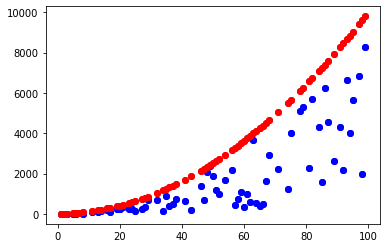

In [29]:
# Call the function and get y_pred

y_pred  = regression_line(b, X_train)

plt.plot(X_train, y_train, "o", color="blue")
plt.plot(X_train, y_pred, "o", color="red")

plt.show()

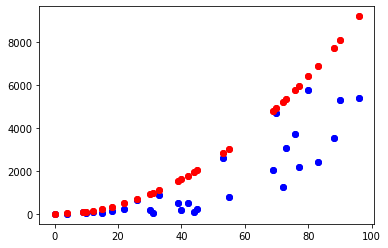

In [30]:
# Call the function and get y_pred

y_pred  = regression_line(b, X_test)

plt.plot(X_test, y_test, "o", color="blue")
plt.plot(X_test, y_pred, "o", color="red")

plt.show()

In [31]:
# Lets calculate the mean squared error

def MSE(y_pred, y_true):

    residuals = 0

    for i in range(len(y_pred)):
        residuals += (y_pred[i] - y_true[i])**2

    return residuals/len(y_pred)

In [32]:
MSE(y_pred, y_test)

tensor(4192827.)

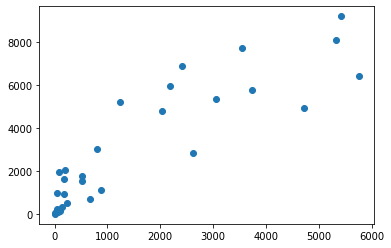

In [33]:
plt.plot(y_test, y_pred, "o")